In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# Loading the data into the data frame.
df = pd.read_csv(r"/content/lingualsense_dataset.csv")
df.head(100)

Text  Language
0   klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1   sebes joseph pereira thomas  på eng the jesuit...   Swedish
2   ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3   விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4   de spons behoort tot het geslacht haliclona en...     Dutch
..                                                ...       ...
95  tempore imperii romani thermae -arum fpl verbu...     Latin
96  ei fuerunt occisi icum accusationibus falsis e...     Latin
97  a talk by takis fotopoulos about the internati...   English
98  نن ټکی اسیا په خپل کاري مجال کې وتوانېدل چې په...    Pushto
99  자사 노선은 도부 스카이트리라인 오시아게 - 도부 도부쓰코엔 사이 도부 철도 이세사...    Korean

[100 rows x 2 columns]

In [10]:
df.describe()

Text Language
count                                               32337    32337
unique                                              32126       30
top     haec commentatio automatice praeparata res ast...  English
freq                                                   48     2385

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32337 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32337 non-null  object
 1   Language  32337 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB


In [12]:
df["Language"].value_counts()

Language
English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1546
Arabic        1536
Turkish       1474
Tamil         1469
Hindi         1063
Romanian      1000
Persian       1000
Pushto        1000
Swedish       1000
Estonian      1000
Korean        1000
Chinese       1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Japanese      1000
Thai          1000
Portugeese     739
Italian        698
Sweedish       676
Malayalam      594
German         470
Danish         428
Kannada        369
Greek          365
Name: count, dtype: int64

In [13]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)
df = df.drop_duplicates()
df.count()

# Checking missing values
df.isnull().sum()

Number of duplicate rows:  (207, 2)


Text        0
Language    0
dtype: int64

## Label Encoding

In [14]:
import re

# Function to clean text
def clean_text(text):
    # Remove backslashes, line breaks, and extra whitespaces
    text = re.sub(r'\\', '', text)       # Remove backslashes
    text = re.sub(r'\n', ' ', text)      # Replace line breaks with a space
    text = re.sub(r'\s+', ' ', text)     # Replace multiple spaces with a single space

    # Remove special characters except for non-English text
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)      # Remove numbers

    # Remove leading and trailing whitespaces
    text = text.strip()

    return text

In [15]:
df['Cleaned_text'] = df['Text'].apply(clean_text)
# Convert text to lowercase
df['Cleaned_text'] = df['Cleaned_text'].str.lower()

print(df['Cleaned_text'])

0        klement gottwaldi surnukeha palsameeriti ning ...
1        sebes joseph pereira thomas på eng the jesuits...
2        ถนนเจรญกรง อกษรโรมน thanon charoen krung เรมตง...
3        வசகபபடடனம தமழசசஙகதத இநதப பததரகவசகபபடடன ஆசரயர ச...
4        de spons behoort tot het geslacht haliclona en...
                               ...                        
32332             ನಮಮ ತಪಪ ಏನ ಬದದಯದರ ಆ ದನದದ ನಮಗ ಒಳಳಯದನನ ನಡಣ
32333    ನರಸಸ ತನ ಮದಲಗ ಹಣಗಡತತದದ ಮರಗಗಳನನ ಬದಲಯಸದಳ ಆದರ ನಧನವ...
32334    ಹಗ  ನರಸಸಸಮ ಈಗ ಮರಯನ ಅವರಗ ಸಭವಸದ ಎಲಲವನನ ಹಳದ ಮತತ ಅ...
32335          ಅವಳ ಈಗ ಹಚಚ ಚನನದ ಬರಡ ಬಯಸವದಲಲ ಎದ ನನ ess ಹಸದದನ
32336    ಟರರ ನವ ನಜವಗಯ ಆ ದವದತನತ ಸವಲಪ ಕಣತತದದರ ಆದರ ನನ ಏನ ನ...
Name: Cleaned_text, Length: 32130, dtype: object


In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()
df['Language_encoded'] = label_encoding.fit_transform(df['Language'])
print(df[['Text', 'Language','Cleaned_text', 'Language_encoded']])

                                                    Text  Language  \
0      klement gottwaldi surnukeha palsameeriti ning ...  Estonian   
1      sebes joseph pereira thomas  på eng the jesuit...   Swedish   
2      ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai   
3      விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil   
4      de spons behoort tot het geslacht haliclona en...     Dutch   
...                                                  ...       ...   
32332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...   Kannada   
32333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...   Kannada   
32334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...   Kannada   
32335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...   Kannada   
32336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...   Kannada   

                                            Cleaned_text  Language_encoded  
0      klement gottwaldi surnukeha palsameeriti ning ...                 5  
1    

In [18]:
from sklearn.model_selection import train_test_split
X = df['Cleaned_text']
y = df['Language_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training Deep Learning Model

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize and fit the tokenizer


---



This code is part of the text preprocessing pipeline, specifically for converting text data into a format that can be used in machine learning models.
*   Tokenizer: This is a Keras utility used for converting text into sequences of integers (tokens) by creating a vocabulary of words found in the dataset.
* num_words=10000: This parameter limits the tokenizer to only consider the top 10,000 most frequent words. Words that occur less frequently than the 10,000th most frequent word are ignored.
*oov_token='<OOV>': Out-of-Vocabulary (OOV) token. This token is used to represent any word that is encountered during tokenization but is not in the vocabulary (i.e., words not in the top 10,000). This ensures the model can handle previously unseen words during inference.

In [20]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'de': 2, 'क': 3, 'a': 4, 'the': 5, 'la': 6, 'en': 7, 'in': 8, 'ह': 9, 'د': 10, 'of': 11, 'په': 12, 'و': 13, 'म': 14, 'que': 15, 'در': 16, 'et': 17, 'i': 18, 'and': 19, 'o': 20, 'او': 21, 'في': 22, 'в': 23, 'e': 24, 'är': 25, 'به': 26, 'le': 27, 'el': 28, 'un': 29, 'to': 30, 'y': 31, 'van': 32, 'se': 33, 'من': 34, 'کے': 35, 'از': 36, 'и': 37, 'میں': 38, 'à': 39, 'on': 40, 'is': 41, 'और': 42, 'het': 43, 've': 44, 'کی': 45, 'ہے': 46, 'och': 47, 'स': 48, 'est': 49, 'di': 50, 'în': 51, 'da': 52, 'اور': 53, 'du': 54, 'که': 55, 'dan': 56, 'کې': 57, 'den': 58, 'por': 59, 'een': 60, 'yang': 61, 'em': 62, 'چې': 63, 'les': 64, 'des': 65, 'was': 66, 'para': 67, 'do': 68, 'سے': 69, 'as': 70, 'no': 71, 'ja': 72, 'și': 73, 'los': 74, 'एक': 75, 'این': 76, 'del': 77, 'bir': 78, 'له': 79, 'کا': 80, 'av': 81, 'على': 82, 'for': 83, 'med': 84, 'است': 85, 'را': 86, 'पर': 87, 'din': 88, 'una': 89, 'на': 90, 'al': 91, 'اس': 92, 'थ': 93, 'som': 94, 'como': 95, 'au': 96, 'um': 97, 'wikipedia': 98, 

In [21]:
# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
print("Train sequence:", X_train_sequences[:1])
print("Test sequence:", X_test_sequences[:1])

Train sequence: [[2532, 449, 562, 1, 1, 9278, 83, 1, 2985, 1, 5167, 8, 1, 1, 1, 2380, 4910, 1, 19, 1, 1, 3722, 1, 1, 7409, 4, 1050, 83, 1, 1676, 40, 9279, 1, 19, 1, 2800, 4911, 2181, 2115]]
Test sequence: [[4, 2587, 1, 59, 1, 1, 132, 1, 1, 24, 1047, 2, 97, 2660, 2, 1, 1, 1, 4, 273, 1559, 1, 20, 1702, 68, 3306, 5170, 1, 2587, 1, 138, 1, 62, 787, 20, 788, 24, 1473, 138, 1, 332, 1, 3023, 3606, 1, 4876, 111, 1, 24, 97, 1, 1, 15, 4, 1, 2, 97, 8745, 2, 1664, 849, 4732, 2, 3774, 1, 1, 2270, 4, 1, 15, 6425, 163, 1, 849, 4732, 2, 1, 1211, 1577, 163, 2990, 1, 4, 1, 2922, 24, 4547, 97, 1, 15, 898, 1, 1057, 1, 24, 1, 1, 71, 1, 24, 109, 2149, 52, 1, 15, 33, 1, 327, 118, 1, 68, 1, 97, 1837, 2, 1, 24, 1]]


# Defining Padding Sequence

---


This code snippet is used to ensure that all input sequences have a consistent length, which is required for neural network models in TensorFlow. Here's a breakdown of the steps:
```
# 1. max_length = 100
```


This defines the maximum length for each input sequence. If a sequence (such as a sentence or text) is shorter than max_length, it will be padded with zeros. If it's longer than max_length, it will be truncated.


```
# 2. Padding the Sequences: pad_sequences
```


The pad_sequences function is part of TensorFlow's Keras library. It pads or truncates the sequences to ensure that all input data has the same length, which is necessary for batch processing in neural networks.


```
# 3. x_train_padded_sequences = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')

```


X_train_sequences: These are the tokenized sequences from your training data.
maxlen=max_length: This parameter ensures that all sequences are either padded or truncated to a fixed length of 100 (as defined by max_length).
padding='post': This means that if the sequence is shorter than max_length, padding will be added to the end (post-padding). If you used padding='pre', the padding would be added to the start of the sequence.
truncating='post': This means that if a sequence is longer than max_length, it will be truncated at the end (post-truncating). If you used truncating='pre', the truncation would occur at the beginning of the sequence.

In [22]:
# Define padding sequence
max_length = 100
# Pad sequences
x_train_padded_sequences = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
x_test_padded_sequences = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

In [23]:
# Print examples of tokenized and padded sequences
print("Padded Train Sequence:", x_train_padded_sequences[:1])
print("Padded Test Sequence:", x_test_padded_sequences[:1])

Padded Train Sequence: [[2532  449  562    1    1 9278   83    1 2985    1 5167    8    1    1
     1 2380 4910    1   19    1    1 3722    1    1 7409    4 1050   83
     1 1676   40 9279    1   19    1 2800 4911 2181 2115    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]
Padded Test Sequence: [[   4 2587    1   59    1    1  132    1    1   24 1047    2   97 2660
     2    1    1    1    4  273 1559    1   20 1702   68 3306 5170    1
  2587    1  138    1   62  787   20  788   24 1473  138    1  332    1
  3023 3606    1 4876  111    1   24   97    1    1   15    4    1    2
    97 8745    2 1664  849 4732    2 3774    1    1 2270    4    1   15
  6425  163    1  849 4732    2    1 1211 1577  163 2990    1    4    1
  292

# Defining parameters

---

These are key parameters for defining the architecture of a GRU-based neural network.

embedding_dim = 64:
Represents each word in your text data as a 64-dimensional vector.

gru_units = 64:
Specifies the number of hidden units in the GRU layer, determining how much information it can store and process at each step.

dropout_rate = 0.2:
 Applies a 20% chance of randomly turning off neurons to help reduce overfitting and improve model generalization.


In [2]:
embedding_dim = 64   # Dimensionality of the word embeddings
gru_units = 64       # Number of GRU units
dropout_rate = 0.2   # Dropout rate

# Loading tokenizer and label encoder

---




In [4]:
tokenizer = joblib.load('/content/tokenizer (1).joblib')
label_encoding = joblib.load('/content/label_encoder1.joblib')
num_classes = len(label_encoding.classes_)  # Number of classes from label encoder
max_length = 100  # Set the max length as per your data preprocessing

# Defining GRU model

---
This code defines, compiles, trains, and evaluates a GRU-based model for text classification.


**Embedding Layer:**
The first layer is an Embedding layer that converts words into dense vectors of fixed size (embedding_dim).

The size of the embedding matrix is (len(tokenizer.word_index) + 1, embedding_dim), where tokenizer.word_index is the word-to-index mapping, and embedding_dim is the number of dimensions for each word vector.
The +1 accounts for the zero index (padding).
The input_length=max_length specifies the fixed length for input sequences

**First GRU Layer:**
The first GRU layer with gru_units defines the size of the hidden state. The return_sequences=True ensures that the layer returns the full sequence (useful when stacking GRU layers).

**Dropout Layers:**
Dropout layers help in regularization by randomly setting a fraction of the input units to zero, preventing overfitting.

Second GRU Layer:

The second GRU layer also has gru_units, but without return_sequences=True, meaning it only returns the final hidden state.

**Dense Output Layer:**
The final Dense layer is used for classification. The number of units in this layer corresponds to num_classes (the number of categories), and the activation function is softmax, which is suitable for multi-class classification problems.


In [24]:
gru_model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_length),
    GRU(gru_units, return_sequences=True),
    Dropout(dropout_rate),
    GRU(gru_units),
    Dropout(dropout_rate),
    Dense(num_classes, activation='softmax')
])

gru_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
gru_model.summary()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the GRU model
gru_history = gru_model.fit(
    x_train_padded_sequences, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test_padded_sequences, y_test),
    callbacks=[early_stopping]  # Use early stopping
)

# Evaluating the model
gru_loss, gru_accuracy = gru_model.evaluate(x_test_padded_sequences, y_test)
print(f"GRU Model - Loss: {gru_loss:.4f}, Accuracy: {gru_accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 178s 432ms/step - accuracy: 0.0808 - loss: 3.2224 - val_accuracy: 0.3299 - val_loss: 2.1364
Epoch 2/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 214s 462ms/step - accuracy: 0.3628 - loss: 1.9004 - val_accuracy: 0.6421 - val_loss: 1.0938
Epoch 3/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 199s 456ms/step - accuracy: 0.7173 - loss: 0.9235 - val_accuracy: 0.8481 - val_loss: 0.5482
Epoch 4/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 200s 451ms/step - accuracy: 0.8758 - loss: 0.4596 - val_accuracy: 0.8866 - val_loss: 0.4170
Epoch 5/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 201s 449ms/step - accuracy: 0.9194 - loss: 0.3140 - val_accuracy: 0.9013 - val_loss: 0.3705
Epoch 6/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 175s 436ms/step - accuracy: 0.9199 - loss: 0.3027 - val_accuracy: 0.9040 - val_loss: 0.3525
Epoch 7/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 202s 435ms/step - accuracy: 0.9349 - loss: 0.2258 - val_accuracy: 0.9087 - val_loss: 0.3521
Epoch 8/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 181s 450ms/step - accuracy: 0.9358 -

# Saving the model


In [25]:
gru_model.save('gru_model.h5')
print("GRU model saved successfully.")

GRU model saved successfully.


# Plotting GRU model accuracy


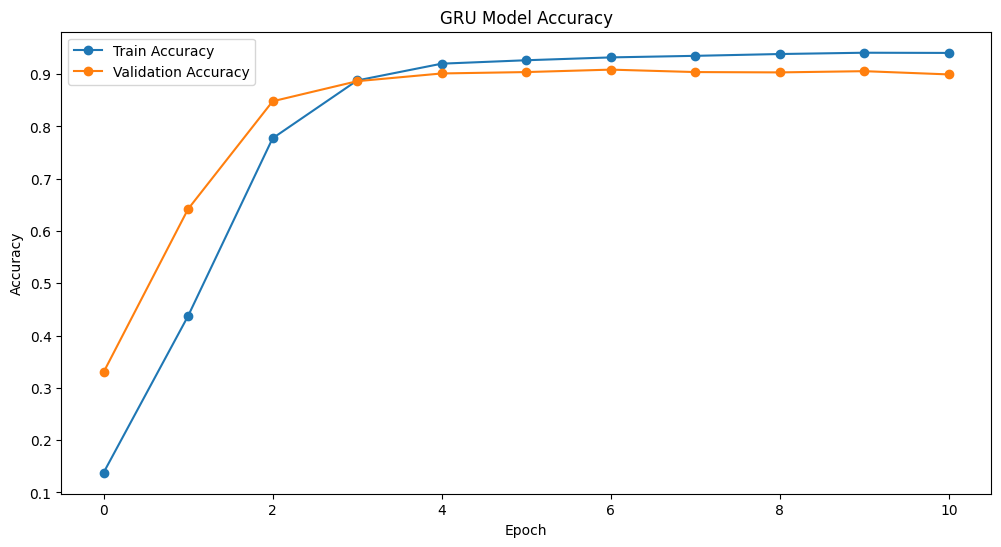

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(gru_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(gru_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('GRU Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting GRU model loss


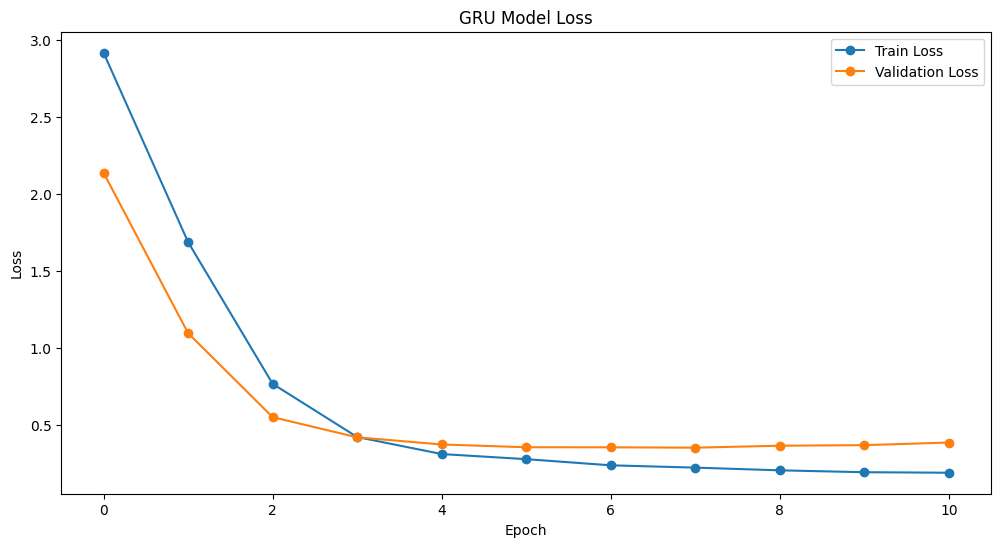

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(gru_history.history['loss'], label='Train Loss', marker='o')
plt.plot(gru_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()